In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings

from IPython.display import display
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


In [2]:
data_xls = pd.read_excel('New_York.xls', header=4, skipfooter=3)


In [3]:
data_xls

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,1781,3,0,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,nan,7,31,68,2118,204,1882,32,3.000
8,Amityville Village,9519,9,0,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,nan,0,12,18,405,99,291,15,0.000


In [4]:
data_xls.columns = ['City', 'Population', 'Violent crime', 'Murder', 'Rape1', 'Rape2', 'Robbery', 'Assault', 'Property crime', 'Burglary', 'Larceny', 'Car theft', 'Arson']

In [5]:
data_xls.head()

,City,Population,Violent crime,Murder,Rape1,Rape2,Robbery,Assault,Property crime,Burglary,Larceny,Car theft,Arson
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [6]:
NY = pd.DataFrame(data_xls)

In [7]:
NY.isnull().sum()

City                0
Population          0
Violent crime       0
Murder              0
Rape1             348
Rape2               0
Robbery             0
Assault             0
Property crime      0
Burglary            0
Larceny             0
Car theft           0
Arson             161
dtype: int64

In [8]:
NY.shape

(348, 13)

In [9]:
NY = NY.drop("Rape1",axis=1)

In [10]:
NY = NY.drop("Arson",axis=1)

In [11]:
NY = NY[NY.City != "New York"]

In [12]:
pd.read_csv?

In [13]:
NY['Murder1'] = np.where(NY['Murder'] >0, 1,0)

In [14]:
NY['Robbery1'] = np.where(NY['Robbery'] >0, 1, 0)

In [15]:
NY['Population2'] = (NY['Population'])^2 

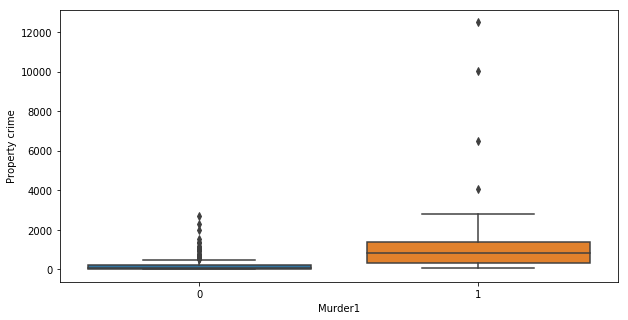

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x=NY['Murder1'], y = NY['Property crime'])
plt.show()

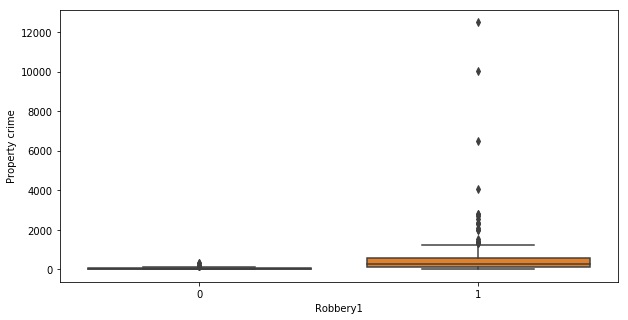

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x=NY['Robbery1'], y = NY['Property crime'])
plt.show()

<Figure size 720x360 with 0 Axes>

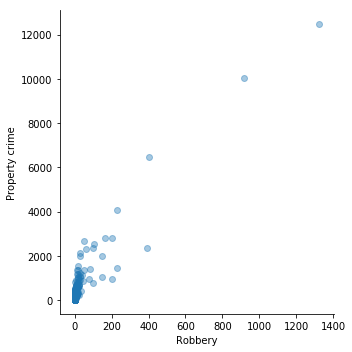

In [18]:
plt.figure(figsize=(10,5))
g = sns.lmplot(y='Property crime', 
              x='Robbery', 
              data=NY,
              fit_reg=False, 
              scatter_kws={'alpha':0.4}) 
g.set_ylabels("Property crime")
g.set_xlabels("Robbery")

plt.show()

<Figure size 720x360 with 0 Axes>

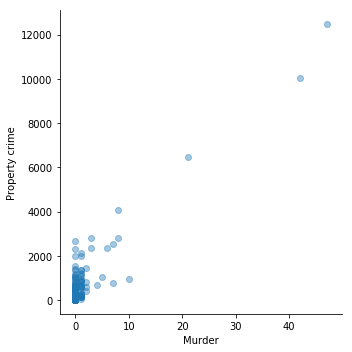

In [19]:
plt.figure(figsize=(10,5))
g = sns.lmplot(y='Property crime', 
              x='Murder', 
              data=NY,
              fit_reg=False, 
              scatter_kws={'alpha':0.4}) 
g.set_ylabels("Property crime")
g.set_xlabels("Murder")

plt.show()

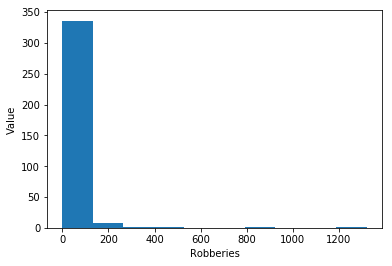

In [20]:
plt.hist(NY['Robbery'])
plt.xlabel('Robberies')
plt.ylabel('Value')
plt.show()

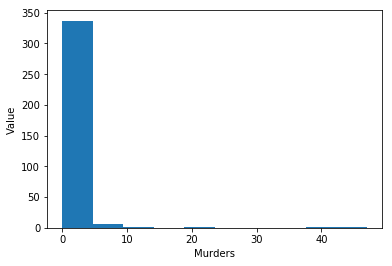

In [21]:
plt.hist(NY['Murder'])
plt.xlabel('Murders')
plt.ylabel('Value')
plt.show()

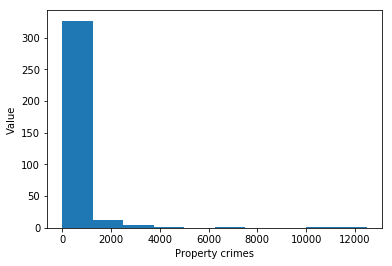

In [22]:
plt.hist(NY['Property crime'])
plt.xlabel("Property crimes")
plt.ylabel("Value")
plt.show()

Text(0.5,1,'Square Root Robbery')

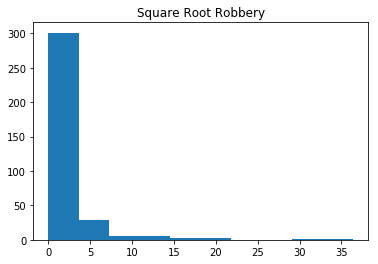

In [35]:
plt.hist(np.sqrt(NY['Robbery']))
plt.title('Square Root Robbery')

Text(0.5,1,'Robbery Log')

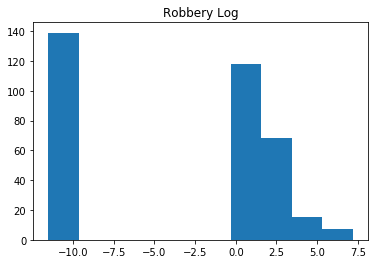

In [31]:
plt.hist(np.log(NY['Robbery']))
plt.title('Robbery Log')

Text(0.5,1,'Murder Log')

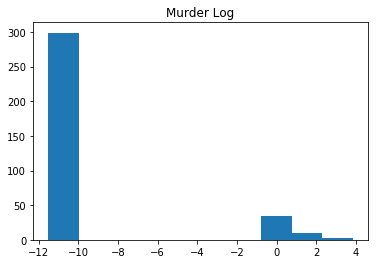

In [32]:
plt.hist(np.log(NY['Murder']))
plt.title('Murder Log')

Text(0.5,1,'Murder Sqrt')

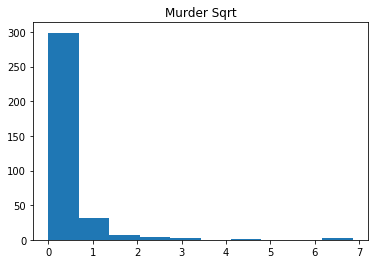

In [36]:
plt.hist(np.sqrt(NY['Murder']))
plt.title('Murder Sqrt')